# EDA Lab

## Cleaning the data

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# load data as csv file
df = pd.read_csv('./hw data/GSS_data.csv')

# print out first 10 rows
print(df.head(10))

   year  id_            wrkstat        marital                educ  \
0  1972    1  Working full time  Never married  4 years of college   
1  1972    2            Retired        Married          10th grade   
2  1972    3  Working part time        Married          12th grade   
3  1972    4  Working full time        Married  5 years of college   
4  1972    5      Keeping house        Married          12th grade   
5  1972    6  Working full time  Never married  2 years of college   
6  1972    7  Working full time       Divorced   1 year of college   
7  1972    8  Working full time  Never married  4 years of college   
8  1972    9  Working part time  Never married          12th grade   
9  1972   10  Working full time        Married          12th grade   

            polviews          happy                  satfin  realinc  
0  .i:  Inapplicable  Not too happy    Not satisfied at all  18951.0  
1  .i:  Inapplicable  Not too happy  More or less satisfied  24366.0  
2  .i:  Inapplic

In [3]:
# Cleaning wrkstat column
# print value counts
print(df['wrkstat'].value_counts(dropna=False))

# replace "do not know/cannot choose" with "no answer" by using dummy variable 
df['wrkstat'] = df['wrkstat'].replace('.d:  Do not Know/Cannot Choose', '.n:  No answer')

# replace "skipped on web" with "no answer" by using dummy variable
df['wrkstat'] = df['wrkstat'].replace('.s:  Skipped on Web', '.n:  No answer')

# replace ".n:  No answer" with just "No answer" to make easier to read
df['wrkstat'] = df['wrkstat'].replace('.n:  No answer', 'No answer')

# replace "In school" with "Student" to make easier to read
df['wrkstat'] = df['wrkstat'].replace('In school', 'Student')

# replace "Unemployed, laid off, looking for work" with just "Unemployed" to make easier to read
df['wrkstat'] = df['wrkstat'].replace('Unemployed, laid off, looking for work', 'Unemployed')

# replace "With a job, but not at work because of temporary illness, vacation, strike" with just "Has job, but not actively working"
df['wrkstat'] = df['wrkstat'].replace('With a job, but not at work because of temporary illness, vacation, strike', 'Has job, but not actively working')

print("\n **Cleaned** \n")
print(df['wrkstat'].value_counts(dropna=False))

wrkstat
Working full time                                                             35267
Retired                                                                       10886
Keeping house                                                                 10764
Working part time                                                              7430
Unemployed, laid off, looking for work                                         2621
In school                                                                      2187
Other                                                                          1643
With a job, but not at work because of temporary illness, vacation, strike     1556
.n:  No answer                                                                   26
.s:  Skipped on Web                                                               9
.d:  Do not Know/Cannot Choose                                                    1
Name: count, dtype: int64

 **Cleaned** 

wrkstat
Working full time 

In [4]:
# Cleaning marital column
# print value counts
print(df['marital'].value_counts(dropna=False))

# replace "do not know/cannot choose" with "no answer" by using dummy variable 
df['marital'] = df['marital'].replace('.d:  Do not Know/Cannot Choose', '.n:  No answer')

# replace "skipped on web" with "no answer" by using dummy variable
df['marital'] = df['marital'].replace('.s:  Skipped on Web', '.n:  No answer')

# replace ".n:  No answer" with just "No answer" to make easier to read
df['marital'] = df['marital'].replace('.n:  No answer', 'No answer')

print("\n **Cleaned** \n")
print(df['marital'].value_counts(dropna=False))

marital
Married                           37596
Never married                     15904
Divorced                           9642
Widowed                            6756
Separated                          2441
.n:  No answer                       37
.s:  Skipped on Web                  12
.d:  Do not Know/Cannot Choose        2
Name: count, dtype: int64

 **Cleaned** 

marital
Married          37596
Never married    15904
Divorced          9642
Widowed           6756
Separated         2441
No answer           51
Name: count, dtype: int64


In [5]:
# Cleaning educ column
# print value counts
print(df['educ'].value_counts(dropna=False))

# replace "do not know/cannot choose" with "no answer" by using dummy variable 
df['educ'] = df['educ'].replace('.d:  Do not Know/Cannot Choose', '.n:  No answer')

# replace ".n:  No answer" with just "No answer" to make easier to read
df['educ'] = df['educ'].replace('.n:  No answer', 'No answer')

# replace 1st, 2nd, 3rd, 4th grade with some elementary school 
df['educ'] = df['educ'].replace('1st grade', 'Some elementary school')
df['educ'] = df['educ'].replace('2nd grade', 'Some elementary school')
df['educ'] = df['educ'].replace('3rd grade', 'Some elementary school')
df['educ'] = df['educ'].replace('4th grade', 'Some elementary school')

# replace 5th grade with elementary school
df['educ'] = df['educ'].replace('5th grade', 'Elementary school')

# replace 6th and 7th grade with some intermediate school
df['educ'] = df['educ'].replace('6th grade', 'Some intermediate school')
df['educ'] = df['educ'].replace('7th grade', 'Some intermediate school')

# replace 8th grade with intermediate school
df['educ'] = df['educ'].replace('8th grade', 'Intermediate school')

# replace 9th, 10th, 11th grade with Some high school
df['educ'] = df['educ'].replace('9th grade', 'Some high school')
df['educ'] = df['educ'].replace('10th grade', 'Some high school')
df['educ'] = df['educ'].replace('11th grade', 'Some high school')

# replace 12th grade with High School
df['educ'] = df['educ'].replace('12th grade', 'High school')

# replace 8 or more with 8+ so less wordy
# not changing _ years of college to specific degrees because degrees can take different amounts of time to complete
df['educ'] = df['educ'].replace('8 or more years of college', '8+ years of college')

print("\n **Cleaned** \n")
print(df['educ'].value_counts(dropna=False))


educ
12th grade                        21401
4 years of college                 9994
2 years of college                 8208
1 year of college                  5905
11th grade                         3942
3 years of college                 3307
10th grade                         3010
6 years of college                 2945
8th grade                          2786
5 years of college                 2392
9th grade                          2172
8 or more years of college         1803
7 years of college                 1112
7th grade                           896
6th grade                           866
5th grade                           410
4th grade                           326
3rd grade                           268
No formal schooling                 177
.n:  No answer                      172
2nd grade                           158
.d:  Do not Know/Cannot Choose       91
1st grade                            49
Name: count, dtype: int64

 **Cleaned** 

educ
High school                 

In [6]:
# cleaning polviews column
# print value counts
print(df['polviews'].value_counts(dropna=False))

# replace "do not know/cannot choose"  with "no answer" as dummy variable 
df['polviews'] = df['polviews'].replace(".d:  Do not Know/Cannot Choose", "No answer")

# replace "skipped on web" with "no answer as dummy variable"
df['polviews'] = df['polviews'].replace(".s:  Skipped on Web", "No answer")

# replace ".n:  no answer" with "no answer" for simplicity 
df['polviews'] = df['polviews'].replace(".n:  No answer", "No answer")

# replace ".i:  Inapplicable" with just "Inapplicable"
df['polviews'] = df['polviews'].replace(".i:  Inapplicable", "Inapplicable")

# replace "moderate, middle of the road" with just "moderate"
df['polviews'] = df['polviews'].replace("Moderate, middle of the road", "Moderate")

print("\n **Cleaned** \n")
print(df['polviews'].value_counts(dropna=False))

polviews
Moderate, middle of the road      23992
Slightly conservative              9596
Conservative                       9361
Slightly liberal                   7900
Liberal                            7623
.i:  Inapplicable                  6793
.d:  Do not Know/Cannot Choose     2409
Extremely conservative             2165
Extremely liberal                  2081
.n:  No answer                      413
.s:  Skipped on Web                  57
Name: count, dtype: int64

 **Cleaned** 

polviews
Moderate                  23992
Slightly conservative      9596
Conservative               9361
Slightly liberal           7900
Liberal                    7623
Inapplicable               6793
No answer                  2879
Extremely conservative     2165
Extremely liberal          2081
Name: count, dtype: int64


In [7]:
# Cleaning happy column
# print value counts
print(df['happy'].value_counts(dropna=False))

# replace "do not know/cannot choose"  with "no answer" as dummy variable 
df['happy'] = df['happy'].replace(".d:  Do not Know/Cannot Choose", "No answer")

# replace "skipped on web" with "no answer as dummy variable"
df['happy'] = df['happy'].replace(".s:  Skipped on Web", "No answer")

# replace ".n:  no answer" with "no answer" for simplicity 
df['happy'] = df['happy'].replace(".n:  No answer", "No answer")

# replace ".i:  Inapplicable" with just "Inapplicable"
df['happy'] = df['happy'].replace(".i:  Inapplicable", "Inapplicable")

print("\n **Cleaned** \n")
print(df['happy'].value_counts(dropna=False))

happy
Pretty happy                      37813
Very happy                        20385
Not too happy                      9390
.i:  Inapplicable                  4383
.n:  No answer                      343
.d:  Do not Know/Cannot Choose       51
.s:  Skipped on Web                  25
Name: count, dtype: int64

 **Cleaned** 

happy
Pretty happy     37813
Very happy       20385
Not too happy     9390
Inapplicable      4383
No answer          419
Name: count, dtype: int64


In [8]:
# Cleaning satfin column
# print value counts
print(df['satfin'].value_counts(dropna=False))

# replace "do not know/cannot choose"  with "no answer" as dummy variable 
df['satfin'] = df['satfin'].replace(".d:  Do not Know/Cannot Choose", "No answer")

# replace "skipped on web" with "no answer as dummy variable"
df['satfin'] = df['satfin'].replace(".s:  Skipped on Web", "No answer")

# replace ".n:  no answer" with "no answer" for simplicity 
df['satfin'] = df['satfin'].replace(".n:  No answer", "No answer")

# replace ".i:  Inapplicable" with just "Inapplicable"
df['satfin'] = df['satfin'].replace(".i:  Inapplicable", "Inapplicable")

print("\n **Cleaned** \n")
print(df['satfin'].value_counts(dropna=False))

satfin
More or less satisfied            29987
Pretty well satisfied             19726
Not satisfied at all              18009
.i:  Inapplicable                  4383
.n:  No answer                      135
.d:  Do not Know/Cannot Choose      128
.s:  Skipped on Web                  22
Name: count, dtype: int64

 **Cleaned** 

satfin
More or less satisfied    29987
Pretty well satisfied     19726
Not satisfied at all      18009
Inapplicable               4383
No answer                   285
Name: count, dtype: int64


In [9]:
# Cleaning realinc column
# print value counts
print(df['realinc'].value_counts(dropna=False))

# rounding to two decimal places for better readability
df['realinc'] = df['realinc'].round(2)

# change values that are negative to np.nan, because can't have negative income
df['realinc'] = df['realinc'].replace(-100, np.nan)

print("\n **Cleaned** \n")
print(df['realinc'].value_counts(dropna=False))

realinc
-100.0000       7478
 25582.5000      394
 120197.0185     372
 29430.0000      367
 38373.7500      360
                ... 
 2409.7500         9
 2951.0000         9
 2331.0000         8
 2695.0000         8
 444.0000          6
Name: count, Length: 676, dtype: int64

 **Cleaned** 

realinc
NaN          7478
25582.50      394
120197.02     372
29430.00      367
38373.75      360
             ... 
2409.75         9
2951.00         9
2331.00         8
2695.00         8
444.00          6
Name: count, Length: 676, dtype: int64


## Numeric Summaries

In [10]:
# looking at wrkstat
# use describe function to look at most frequent answer
print(df['wrkstat'].describe())

# calculate value counts as proportions
w_proportions = df['wrkstat'].value_counts(normalize=True) * 100
# round to 2 decimal places
w_proportions = w_proportions.round(2)

print("\nPercentages: \n" , w_proportions)

count                 72390
unique                    9
top       Working full time
freq                  35267
Name: wrkstat, dtype: object

Percentages: 
 wrkstat
Working full time                    48.72
Retired                              15.04
Keeping house                        14.87
Working part time                    10.26
Unemployed                            3.62
Student                               3.02
Other                                 2.27
Has job, but not actively working     2.15
No answer                             0.05
Name: proportion, dtype: float64


In [11]:
# looking at marital status
# use describe function to look at most frequent answer
print(df['marital'].describe())

# calculate value counts as proportions
m_props = df['marital'].value_counts(normalize=True) * 100

# round to 2 decimal places
m_props = m_props.round(2)

print("\nPercentages: \n" , m_props)

count       72390
unique          6
top       Married
freq        37596
Name: marital, dtype: object

Percentages: 
 marital
Married          51.94
Never married    21.97
Divorced         13.32
Widowed           9.33
Separated         3.37
No answer         0.07
Name: proportion, dtype: float64


In [12]:
# looking at educ
# use describe function to look at most frequent answer
print(df['educ'].describe())

# calculate value counts as proportions
e_props = df['educ'].value_counts(normalize=True) * 100

# round to 2 decimal places
e_props = e_props.round(2)

print("\nPercentages: \n" , e_props)

count           72390
unique             16
top       High school
freq            21401
Name: educ, dtype: object

Percentages: 
 educ
High school                 29.56
4 years of college          13.81
Some high school            12.60
2 years of college          11.34
1 year of college            8.16
3 years of college           4.57
6 years of college           4.07
Intermediate school          3.85
5 years of college           3.30
8+ years of college          2.49
Some intermediate school     2.43
7 years of college           1.54
Some elementary school       1.11
Elementary school            0.57
No answer                    0.36
No formal schooling          0.24
Name: proportion, dtype: float64


In [13]:
# looking at polviews
# use describe function to look at most frequent answer
print(df['polviews'].describe())

# calculate value counts as proportions
p_props = df['polviews'].value_counts(normalize=True) * 100

# round to 2 decimal places
p_props = p_props.round(2)

print("\nPercentages: \n" , p_props)

count        72390
unique           9
top       Moderate
freq         23992
Name: polviews, dtype: object

Percentages: 
 polviews
Moderate                  33.14
Slightly conservative     13.26
Conservative              12.93
Slightly liberal          10.91
Liberal                   10.53
Inapplicable               9.38
No answer                  3.98
Extremely conservative     2.99
Extremely liberal          2.87
Name: proportion, dtype: float64


In [14]:
# looking at happy
# use describe function to look at most frequent answer
print(df['happy'].describe())

# calculate value counts as proportions
h_props = df['happy'].value_counts(normalize=True) * 100

# round to 2 decimal places
h_props = h_props.round(2)

print("\nPercentages: \n" , h_props)

count            72390
unique               5
top       Pretty happy
freq             37813
Name: happy, dtype: object

Percentages: 
 happy
Pretty happy     52.24
Very happy       28.16
Not too happy    12.97
Inapplicable      6.05
No answer         0.58
Name: proportion, dtype: float64


In [15]:
# looking at satfin
# use describe function to look at most frequent answer
print(df['satfin'].describe())

# calculate value counts as proportions
s_props = df['satfin'].value_counts(normalize=True) * 100

# round to 2 decimal places
s_props = s_props.round(2)

print("\nPercentages: \n" , s_props)

count                      72390
unique                         5
top       More or less satisfied
freq                       29987
Name: satfin, dtype: object

Percentages: 
 satfin
More or less satisfied    41.42
Pretty well satisfied     27.25
Not satisfied at all      24.88
Inapplicable               6.05
No answer                  0.39
Name: proportion, dtype: float64


In [16]:
# looking at realinc
# use describe function to look at most frequent answer
print(df['realinc'].describe())

# looking at central tendencies
print("\nCentral Tendencies:")
print('Mean: ', df['realinc'].mean())
print('Median: ', df['realinc'].median())
print('Mode: ', df['realinc'].mode())

count     64912.000000
mean      32479.914920
std       30271.345132
min         204.500000
25%       12080.620000
50%       24395.000000
75%       40900.000000
max      162607.000000
Name: realinc, dtype: float64

Central Tendencies:
Mean:  32479.914919583436
Median:  24395.0
Mode:  0    25582.5
Name: realinc, dtype: float64


In [17]:
# using cross tables to see correlation between satisfaction in financial situation and general happiness
c = pd.crosstab(df['happy'], df['satfin'], dropna=False)
c
# in every satfin column, pretty happy is the column with the highest number 

satfin,Inapplicable,More or less satisfied,No answer,Not satisfied at all,Pretty well satisfied
happy,,,,,
Inapplicable,4383,0,0,0,0
No answer,0,171,40,113,95
Not too happy,0,3166,27,4937,1260
Pretty happy,0,18097,132,10128,9456
Very happy,0,8553,86,2831,8915


In [18]:
# using cross tables to see correlation between highest education level and satisfaction of financial situation
c = pd.crosstab(df['educ'], df['satfin'], dropna=False)
c
# high school is the highest column for all columns of sat fin
# beyond that, 4 years of college is highest "more or less satisfied", some high school is most "not satisfied at all", and 4 years of college is highest "pretty well satisfied"

satfin,Inapplicable,More or less satisfied,No answer,Not satisfied at all,Pretty well satisfied
educ,,,,,
1 year of college,401,2477,21,1652,1354
2 years of college,598,3529,29,2134,1918
3 years of college,227,1358,17,861,844
4 years of college,667,4051,30,1768,3478
5 years of college,152,1046,6,411,777
6 years of college,193,1187,9,434,1122
7 years of college,69,454,3,167,419
8+ years of college,126,668,2,264,743
Elementary school,13,150,1,132,114


In [19]:
# using cross table to see correlation between marital status and labor force status
c = pd.crosstab(df['marital'], df['wrkstat'], dropna=False)
c
# has job -> married , keeping house -> married (by big gap, makes sense for sahm/d), retired -> married but closely followed by widowed (makes sense since older people are usually the retired one)
# student -> never married (makes sense since most students are young), unemployed -> never married (could be mostly young people looking for jobs)
# wft -> married (by large margin), wpt -> married closely followed by never married (aligns again with possible sahm/d and young people)

wrkstat,"Has job, but not actively working",Keeping house,No answer,Other,Retired,Student,Unemployed,Working full time,Working part time
marital,,,,,,,,,
Divorced,225,765,3,392,1440,136,444,5379,858
Married,841,6762,11,547,5117,408,796,19461,3653
Never married,352,1126,12,393,808,1579,1155,8292,2187
No answer,1,9,9,2,10,2,1,14,3
Separated,54,403,1,104,238,47,155,1194,245
Widowed,83,1699,0,205,3273,15,70,927,484


## Visuals

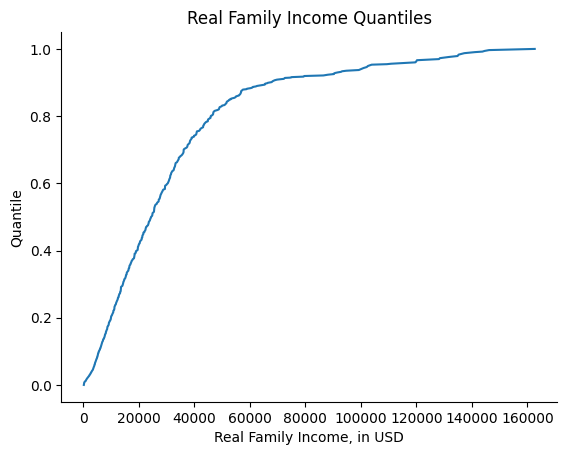

In [20]:
# Empirical Distribution Function plot 
# create new column to rank the values
df['realinc_quantile'] = df['realinc'].rank(method = 'average', pct = True) 

# sort and then plot realinc column
df.sort_values('realinc').plot(x = 'realinc', y = 'realinc_quantile', grid = False)

# get rid of spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# move legend
plt.legend().remove()

# set title
plt.title("Real Family Income Quantiles")

# set axis labels
plt.xlabel("Real Family Income, in USD")
plt.ylabel("Quantile")

plt.show()

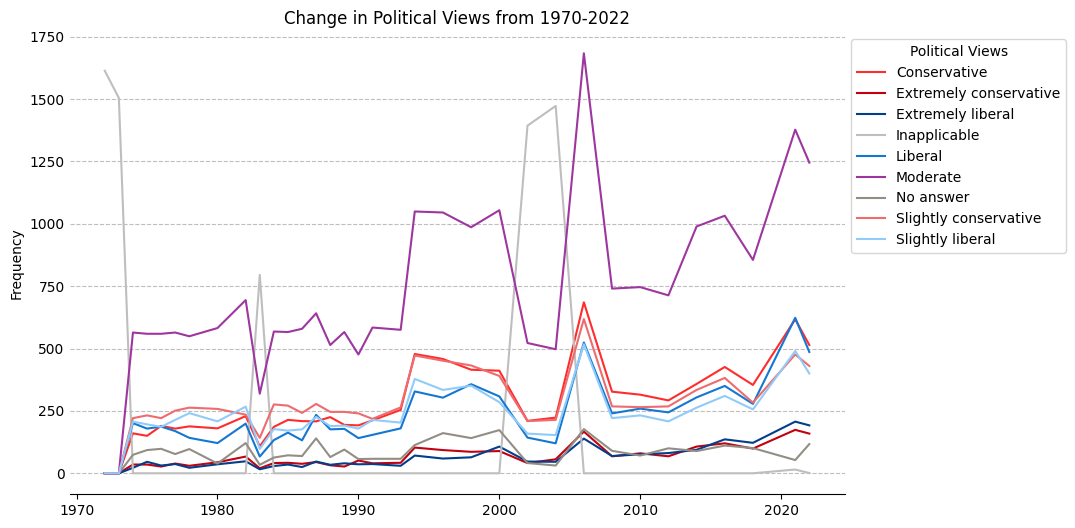

In [21]:
# Create a crosstable of political views by year
polviews_trend = pd.crosstab(df['year'], df['polviews'])

# plot
plt.figure(figsize=(10, 6))

# for each unique value in the column
for col in polviews_trend.columns:
    # plot the column and its frequency
    if col == 'Extremely conservative':
        plt.plot(polviews_trend.index, polviews_trend[col], color='#c30010', label=col)
    elif col == 'Conservative':
        plt.plot(polviews_trend.index, polviews_trend[col], color='#ff2c2c', label=col)
    elif col == 'Slightly conservative':
        plt.plot(polviews_trend.index, polviews_trend[col], color='#ee6b6e', label=col)
    elif col == 'Moderate':
        plt.plot(polviews_trend.index, polviews_trend[col], color='#9e369f', label=col)
    elif col == 'Slightly liberal':
        plt.plot(polviews_trend.index, polviews_trend[col], color='#90cbf9', label=col)
    elif col == 'Liberal':
        plt.plot(polviews_trend.index, polviews_trend[col], color='#1477d2', label=col)
    elif col == 'Extremely liberal':
        plt.plot(polviews_trend.index, polviews_trend[col], color='#023E8A', label=col)
        # for inapplicable values
    elif col == 'No answer':
        plt.plot(polviews_trend.index, polviews_trend[col], color='#928e85', label=col)
    else:
        plt.plot(polviews_trend.index, polviews_trend[col], color='#BEBEBE', label='Inapplicable')

# get ride of spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

# get rid of y ticks
plt.tick_params(axis='y', which='both', length=0)

# plot y axis lines
plt.grid(axis='y', linestyle='--', color='#BEBEBE', which='both', zorder=0)

# add legend
plt.legend(title="Political Views", bbox_to_anchor=(1,1))

# add y axis
plt.ylabel("Frequency")

# add title
plt.title("Change in Political Views from 1970-2022")

plt.show()